In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")
pref["日付"] = pd.to_datetime(pref["日付"] )
print(len(pref))
pref.tail()

23453


,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計
23448,2021-05-24,47,沖縄県,104,15185,0,148
23449,2021-05-25,47,沖縄県,256,15441,0,148
23450,2021-05-26,47,沖縄県,302,15743,0,148
23451,2021-05-27,47,沖縄県,240,15983,0,148
23452,2021-05-28,47,沖縄県,313,16296,0,148


In [3]:
latest_date = pref["日付"].max().strftime("%Y-%m-%d")

In [4]:
all_jp = pref.groupby(["都道府県名"], as_index=False).sum()
del all_jp["各地の感染者数_累計"]
del all_jp["各地の死者数_累計"]
#all_jp = all_jp.rename(columns={"各地の感染者数合計":"各地の感染者数_1日ごとの発表数"})
all_jp = all_jp.rename(columns={"各地の感染者数_1日ごとの発表数":"各地の感染者数合計"})
all_jp = all_jp.rename(columns={"各地の死者数_1日ごとの発表数":"各地の死者数合計"})
all_jp.tail()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計
42,静岡県,10978,8261,136
43,香川県,18463,1982,24
44,高知県,19461,1398,20
45,鳥取県,15469,463,2
46,鹿児島県,22954,3256,30


## 都道府県ごとの最新データを付与

In [5]:
# 直近１週間の感染者数
pref["直近1週間の感染者数"] = pref["各地の感染者数_1日ごとの発表数"].rolling(7).sum()
pref.tail(7)

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,直近1週間の感染者数
23446,2021-05-22,47,沖縄県,231,14925,0,148,1144.0
23447,2021-05-23,47,沖縄県,156,15081,0,148,1222.0
23448,2021-05-24,47,沖縄県,104,15185,0,148,1267.0
23449,2021-05-25,47,沖縄県,256,15441,0,148,1355.0
23450,2021-05-26,47,沖縄県,302,15743,0,148,1454.0
23451,2021-05-27,47,沖縄県,240,15983,0,148,1496.0
23452,2021-05-28,47,沖縄県,313,16296,0,148,1602.0


### 感染者数前日比

In [6]:
import numpy as np
pref["新規感染者数前日比"] = pref["各地の感染者数_1日ごとの発表数"].pct_change()
# 一番古い日付だけNANを設定
pref.loc[pref["日付"]==pref["日付"].min(),"新規感染者数前日比"] = np.nan
pref["直近1週間の新規感染者数前日比平均"] = pref["新規感染者数前日比"].rolling(7).mean()
pref.tail()

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均
23448,2021-05-24,47,沖縄県,104,15185,0,148,1267.0,-0.333333,0.219221
23449,2021-05-25,47,沖縄県,256,15441,0,148,1355.0,1.461538,0.164090
23450,2021-05-26,47,沖縄県,302,15743,0,148,1454.0,0.179688,0.159998
23451,2021-05-27,47,沖縄県,240,15983,0,148,1496.0,-0.205298,0.134188
23452,2021-05-28,47,沖縄県,313,16296,0,148,1602.0,0.304167,0.171147


In [7]:
latest = pref.loc[pref["日付"]==pref["日付"].max()][["都道府県名","直近1週間の感染者数","新規感染者数前日比","直近1週間の新規感染者数前日比平均"]]
latest.head()

,都道府県名,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均
498,北海道,3632.0,-0.257895,-0.048482
997,青森県,187.0,0.600000,0.177780
1496,岩手県,94.0,-0.312500,0.030161
1995,宮城県,125.0,-0.083333,0.068589
2494,秋田県,22.0,-1.000000,0.621599


In [8]:
all_jp = pd.merge(all_jp, latest, on="都道府県名")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均
0,三重県,11976,4835,103,180.0,0.222222,0.178660
1,京都府,12974,15686,210,431.0,-0.192308,-0.067605
2,佐賀県,20459,2478,19,100.0,-0.666667,-0.079731
3,兵庫県,13972,39480,1158,959.0,-0.419753,0.004938
4,北海道,499,36950,1066,3632.0,-0.257895,-0.048482


## 人口データを付与

In [9]:
pop = pd.read_excel("COVID-19-jp/2001stjin.xls",header=3)[["Unnamed: 1","計"]]
pop.rename(columns={"Unnamed: 1":"都道府県名"},inplace=True)
pop.rename(columns={"計":"人口"},inplace=True)
pop = pop.loc[pop["都道府県名"]!="合計"].reset_index(drop=True)

In [10]:
all_jp = pd.merge(all_jp, pop, on="都道府県名", how="left")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口
0,三重県,11976,4835,103,180.0,0.222222,0.178660,1813859
1,京都府,12974,15686,210,431.0,-0.192308,-0.067605,2545899
2,佐賀県,20459,2478,19,100.0,-0.666667,-0.079731,823810
3,兵庫県,13972,39480,1158,959.0,-0.419753,0.004938,5549568
4,北海道,499,36950,1066,3632.0,-0.257895,-0.048482,5267762


## 人口当たりの感染者数

In [11]:
all_jp["１万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 10000)
all_jp["10万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 100000)
all_jp["直近1週間の10万人当たりの感染者数"] = all_jp["直近1週間の感染者数"] / (all_jp["人口"] / 100000)
all_jp.sort_values("都道府県コード")

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
4,北海道,499,36950,1066,3632.0,-0.257895,-0.048482,5267762,70.143640,701.436397,68.947686
41,青森県,998,2315,30,187.0,0.600000,0.177780,1275783,18.145719,181.457191,14.657665
19,岩手県,1497,1407,43,94.0,-0.312500,0.030161,1235517,11.387945,113.879453,7.608151
11,宮城県,1996,8823,83,125.0,-0.083333,0.068589,2292385,38.488299,384.882993,5.452836
36,秋田県,2495,755,12,22.0,-1.000000,0.621599,985416,7.661739,76.617388,2.232560
15,山形県,2994,1940,40,120.0,-0.272727,-0.066628,1082296,17.924856,179.248560,11.087540
35,福島県,3493,4542,140,143.0,-0.166667,-0.012148,1881981,24.134144,241.341438,7.598376
38,茨城県,3992,9640,145,341.0,-0.060000,0.062483,2921436,32.997471,329.974711,11.672342
27,栃木県,4491,6278,78,249.0,0.209302,0.086907,1965516,31.940722,319.407219,12.668429
37,群馬県,4990,7764,136,297.0,-0.368421,0.095819,1969439,39.422394,394.223939,15.080437


## 感染者数

### 平均値、中央値

In [12]:
all_jp["各地の感染者数合計"].describe()

count        47.000000
mean      15646.319149
std       28895.021465
min         463.000000
25%        2396.500000
50%        4747.000000
75%       10041.000000
max      159708.000000
Name: 各地の感染者数合計, dtype: float64

### TOP 10

In [13]:
all_jp.sort_values("各地の感染者数合計", ascending=False).reset_index(drop=True).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
0,東京都,6487,159708,2048,4060.0,-0.102339,0.033574,13834925,115.438284,1154.382839,29.346021
1,大阪府,13473,99208,2260,2153.0,-0.061489,-0.022903,8849635,112.104059,1121.040585,24.328687
2,神奈川県,6986,60885,882,1664.0,0.145374,-0.024521,9209442,66.111497,661.114973,18.068413
3,愛知県,11477,46496,771,2966.0,-0.027919,-0.029277,7575530,61.376564,613.765638,39.152376
4,埼玉県,5489,43430,782,955.0,-0.192308,-0.024218,7390054,58.768177,587.681768,12.922774
5,兵庫県,13972,39480,1158,959.0,-0.419753,0.004938,5549568,71.140673,711.406726,17.280624
6,北海道,499,36950,1066,3632.0,-0.257895,-0.048482,5267762,70.143640,701.436397,68.947686
7,千葉県,5988,36852,677,750.0,-0.016529,-0.026769,6319772,58.312230,583.122303,11.867517
8,福岡県,19960,33697,440,1547.0,0.072626,-0.086578,5129841,65.688196,656.881958,30.156880
9,沖縄県,23453,16296,148,1602.0,0.304167,0.171147,1481547,109.993136,1099.931356,108.130218


## １万人あたりの感染者数

### 平均値、中央値

In [14]:
all_jp["１万人当たりの感染者数"].describe()

count     47.000000
mean      37.386272
std       26.499364
min        7.661739
25%       19.843453
50%       28.743195
75%       49.307474
max      115.438284
Name: １万人当たりの感染者数, dtype: float64

## 直近１週間の１０万人あたりの感染者数

In [15]:
all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
28,沖縄県,23453,16296,148,1602.0,0.304167,0.171147,1481547,109.993136,1099.931356,108.130218
4,北海道,499,36950,1066,3632.0,-0.257895,-0.048482,5267762,70.143640,701.436397,68.947686
24,愛知県,11477,46496,771,2966.0,-0.027919,-0.029277,7575530,61.376564,613.765638,39.152376
21,広島県,16966,10442,126,1004.0,-0.196078,-0.053160,2826858,36.938537,369.385374,35.516464
34,福岡県,19960,33697,440,1547.0,0.072626,-0.086578,5129841,65.688196,656.881958,30.156880
26,東京都,6487,159708,2048,4060.0,-0.102339,0.033574,13834925,115.438284,1154.382839,29.346021
31,石川県,8483,3691,101,310.0,1.277778,0.574136,1139612,32.388216,323.882163,27.202241
18,岡山県,16467,7244,102,502.0,-0.202703,-0.034491,1903627,38.053673,380.536733,26.370712
44,高知県,19461,1398,20,183.0,-0.394737,0.139880,709230,19.711518,197.115181,25.802631
9,大阪府,13473,99208,2260,2153.0,-0.061489,-0.022903,8849635,112.104059,1121.040585,24.328687


## 直近１週間の新規感染者 増加速度

## 増加速度 統計情報

In [16]:
all_jp["直近1週間の新規感染者数前日比平均"].describe()

count    44.000000
mean      0.054526
std       0.151889
min      -0.103110
25%      -0.037989
50%      -0.000678
75%       0.099384
max       0.621599
Name: 直近1週間の新規感染者数前日比平均, dtype: float64

### WORST 10(増加速度の早い順)

In [17]:
all_jp.sort_values("直近1週間の新規感染者数前日比平均",ascending=False).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
36,秋田県,2495,755,12,22.0,-1.000000,0.621599,985416,7.661739,76.617388,2.232560
31,石川県,8483,3691,101,310.0,1.277778,0.574136,1139612,32.388216,323.882163,27.202241
12,宮崎県,22455,3013,25,80.0,0.833333,0.251350,1095903,27.493309,274.933092,7.299916
20,島根県,15968,529,0,40.0,-0.500000,0.239796,679324,7.787153,77.871531,5.888207
16,山梨県,9481,1533,19,79.0,-0.312500,0.197861,826579,18.546322,185.463216,9.557465
0,三重県,11976,4835,103,180.0,0.222222,0.178660,1813859,26.655876,266.558757,9.923594
41,青森県,998,2315,30,187.0,0.600000,0.177780,1275783,18.145719,181.457191,14.657665
28,沖縄県,23453,16296,148,1602.0,0.304167,0.171147,1481547,109.993136,1099.931356,108.130218
44,高知県,19461,1398,20,183.0,-0.394737,0.139880,709230,19.711518,197.115181,25.802631
39,長崎県,20958,2864,63,54.0,-0.533333,0.134014,1350769,21.202737,212.027371,3.997723


### BEST 10(増加速度の遅い順／減少速度の速い順)

In [18]:
all_jp.sort_values("直近1週間の新規感染者数前日比平均",ascending=True).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
8,大分県,21956,3309,45,207.0,-0.181818,-0.103110,1151229,28.743195,287.431953,17.980784
34,福岡県,19960,33697,440,1547.0,0.072626,-0.086578,5129841,65.688196,656.881958,30.156880
22,徳島県,17964,1628,61,22.0,-0.500000,-0.083673,742505,21.925778,219.257783,2.962943
2,佐賀県,20459,2478,19,100.0,-0.666667,-0.079731,823810,30.079751,300.797514,12.138721
1,京都府,12974,15686,210,431.0,-0.192308,-0.067605,2545899,61.612813,616.128134,16.929187
15,山形県,2994,1940,40,120.0,-0.272727,-0.066628,1082296,17.924856,179.248560,11.087540
43,香川県,18463,1982,24,82.0,0.166667,-0.065098,981280,20.198109,201.981086,8.356432
25,新潟県,7485,3159,36,178.0,-0.260870,-0.058884,2236042,14.127642,141.276416,7.960494
21,広島県,16966,10442,126,1004.0,-0.196078,-0.053160,2826858,36.938537,369.385374,35.516464
46,鹿児島県,22954,3256,30,184.0,0.038462,-0.049513,1630146,19.973671,199.736711,11.287333


## グラフ化

In [19]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

In [20]:
all_jp_desc = all_jp.sort_values(["各地の感染者数合計"],ascending=False)
all_jp_desc_10k = all_jp.sort_values(["１万人当たりの感染者数"],ascending=False)
all_jp_desc_100k = all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False)

<IPython.core.display.Javascript object>


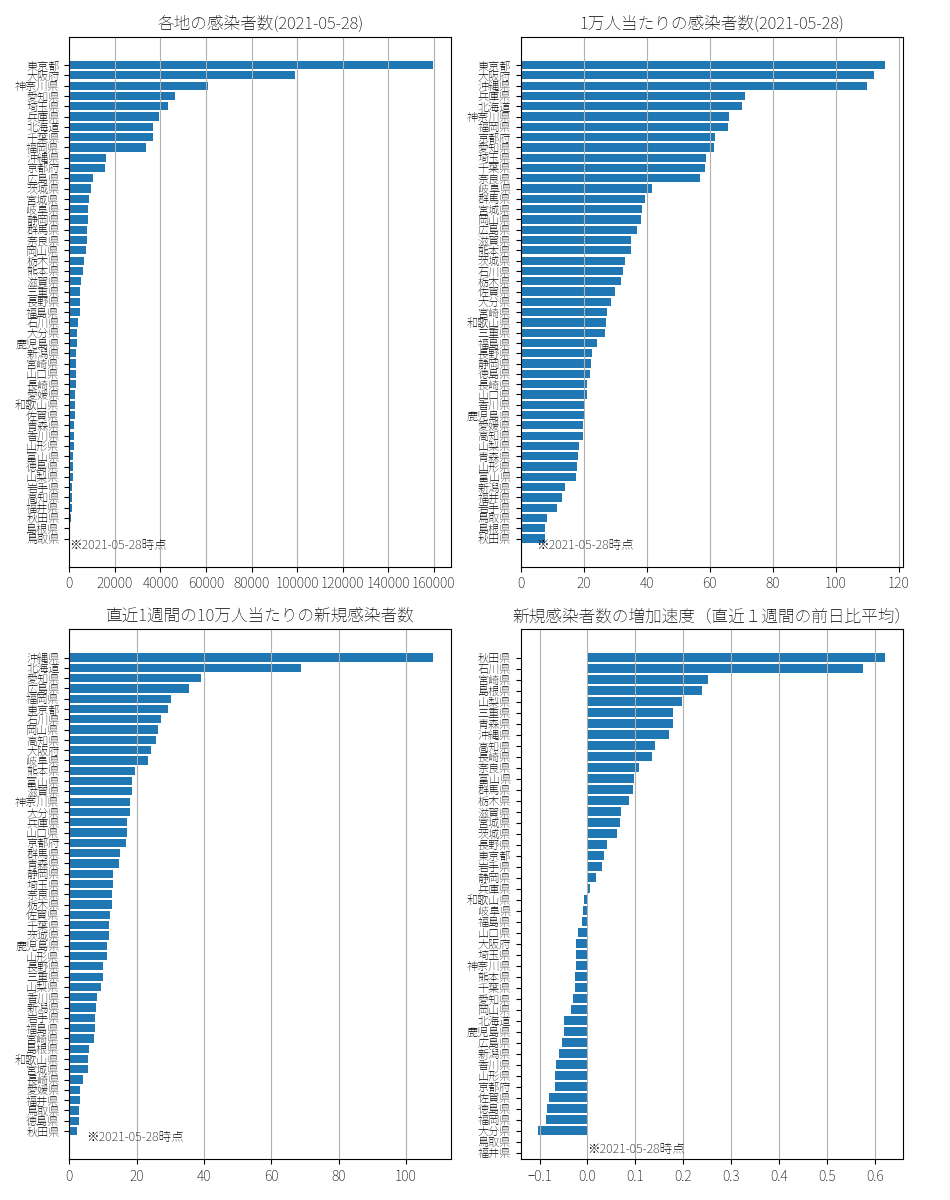

In [21]:
fig = plt.figure(figsize=(9.5,12))
plt.subplot(2,2,1) # (rows, columns, panel number)
#plt.xticks(rotation="70",fontsize=9)
plt.yticks(fontsize=8)
plt.grid(axis="x")
chart_data = all_jp.sort_values(["各地の感染者数合計"])
#plt.bar(all_jp_desc["都道府県名"], all_jp_desc["各地の感染者数合計"])
plt.barh(chart_data["都道府県名"],chart_data["各地の感染者数合計"],align="center")
#plt.title("各地の感染者数", y=0.9)
plt.title("各地の感染者数({})".format(latest_date))
plt.text(5,-1,"※{}時点".format(latest_date),fontsize=9)

plt.subplot(2,2,2) # (rows, columns, panel number)
plt.yticks(fontsize=8)
plt.grid(axis="x")
chart_data = all_jp.sort_values(["１万人当たりの感染者数"])
plt.barh(chart_data["都道府県名"], chart_data["１万人当たりの感染者数"])
plt.title("1万人当たりの感染者数({})".format(latest_date))
plt.text(5,-1,"※{}時点".format(latest_date),fontsize=9)

plt.subplot(2,2,3) # (rows, columns, panel number)
plt.yticks(fontsize=8)
plt.grid(axis="x")
chart_data = all_jp.sort_values(["直近1週間の10万人当たりの感染者数"])
plt.barh(chart_data["都道府県名"], chart_data["直近1週間の10万人当たりの感染者数"])
plt.title("直近1週間の10万人当たりの新規感染者数")
# plt.text(0,chart_data["都道府県名"][-1],"{}時点".format(latest_date))
plt.text(5,-1,"※{}時点".format(latest_date),fontsize=9)

### 新規感染者数の増加速度（直近１週間の前日比平均）
plt.subplot(2,2,4) # (rows, columns, panel number)
chart_data = all_jp.sort_values("直近1週間の新規感染者数前日比平均",na_position="first")
plt.yticks(fontsize=8)
plt.grid(axis="x")
plt.barh(chart_data["都道府県名"], chart_data["直近1週間の新規感染者数前日比平均"])
plt.title("新規感染者数の増加速度（直近１週間の前日比平均）")
plt.text(0,1,"※{}時点".format(latest_date),fontsize=9)

fig.tight_layout()


In [22]:
fig.savefig("/tmp/covid-domestic.png")

## 度数分布表

In [23]:
import numpy as np
data = np.array(all_jp["各地の感染者数合計"])
 
# ヒストグラム
hist, bin_edges = np.histogram(data, bins=8)

print(hist)
print(bin_edges)

[38  4  2  1  1  0  0  1]
[   463.     20368.625  40274.25   60179.875  80085.5    99991.125
 119896.75  139802.375 159708.   ]


## ヒストグラム

<IPython.core.display.Javascript object>


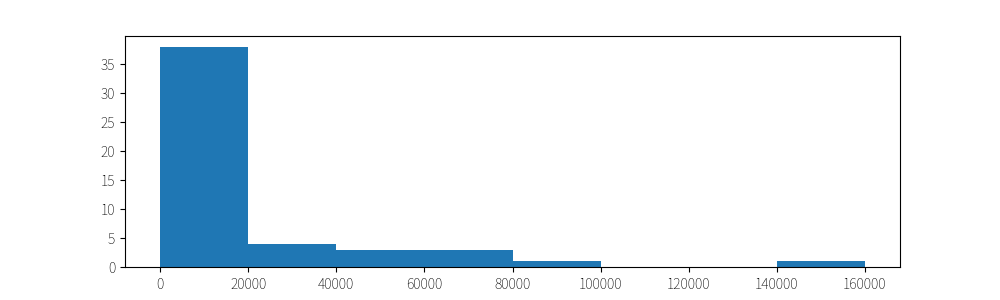

(array([38.,  4.,  3.,  1.,  0.,  0.,  1.]),
 array([     0,  20000,  40000,  80000, 100000, 120000, 140000, 160000]),
 <a list of 7 Patch objects>)

In [24]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["各地の感染者数合計"],bins=[0,20000,40000,80000,100000,120000,140000,160000])

<IPython.core.display.Javascript object>


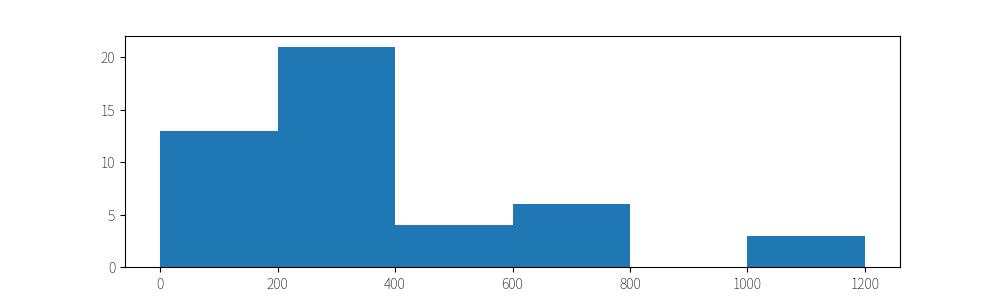

(array([13., 21.,  4.,  6.,  0.,  3.]),
 array([   0,  200,  400,  600,  800, 1000, 1200]),
 <a list of 6 Patch objects>)

In [25]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["10万人当たりの感染者数"],bins=[0,200,400,600,800,1000,1200])
